<center>imports</center>

In [1]:
import mlflow
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
y = pd.read_parquet('d:/BankCustomer/data/bank_v3.parquet').poutcome
X = pd.read_parquet('d:/BankCustomer/data/bank_v5.parquet')

In [3]:
X.shape

(11160, 14)

In [4]:
y.shape

(11160,)

In [5]:
def visualizeClusters(model, X, y) -> None:
    # Apply KMeans clustering
    y_kmeans = model.fit_predict(X)

    # Apply t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    # Visualize clusters
    plt.figure(figsize=(18, 6))

    # Scatter plot of original data
    fig, ax = plt.subplots(nrows=1, ncols=2)
    
    ax[0].scatter(
        X_tsne[:, 0], X_tsne[:, 1], 
        c=y, cmap='viridis', edgecolor='k', 
        s=50, label=y
    )
    ax[0].set_title("Original Data")
    ax[0].legend()

    # Scatter plot of clustered data
    
    ax[1].scatter(
        X_tsne[:, 0], X_tsne[:, 1], 
        c=y_kmeans, cmap='viridis', 
        edgecolor='k', s=50, label=y_kmeans
    )
    ax[1].set_title("Clustered")
    ax[1].legend()

    plt.tight_layout()
    mlflow.log_figure(fig, "kmeans_4_cluster.png")
    plt.show()

<center><b>Experimentation</b></center>

In [6]:
# mlflow.create_experiment("Bank Customer Segmentation Experiment")

<Figure size 1800x600 with 0 Axes>

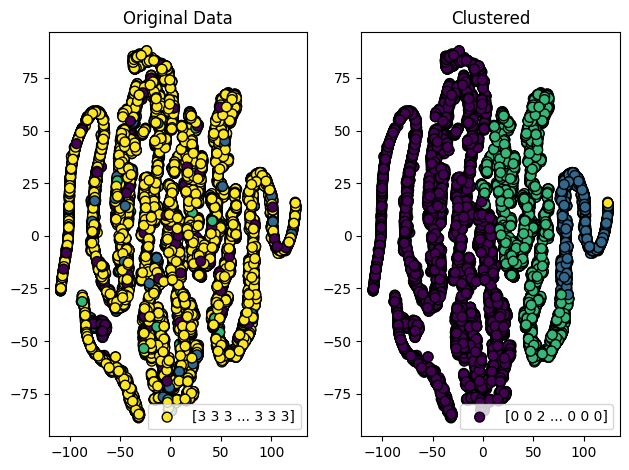

In [7]:
mlflow.set_experiment("Bank Customer Segmentation Experiment")
with mlflow.start_run():
    model = kmeans = KMeans(
        n_clusters=4, init='k-means++',
        n_init='auto', max_iter=300, tol=0.0001,
        verbose=0, random_state=42, copy_x=True,algorithm='lloyd'
    )
    kmeans.fit(X)

    # Log parameters
    mlflow.log_params({
        "model_name": "KMeans",
        "n_clusters": 4,
        "init": 'k-means++',
    })

    

    # Calculate and log the evaluation metric (e.g., inertia)
    sscore = silhouette_score(
        X, kmeans.labels_, metric='euclidean',
        sample_size=None, random_state=42,
    )
    
    charabasz_score = calinski_harabasz_score(X, kmeans.labels_)
    dbouldin_score = davies_bouldin_score(X, kmeans.labels_)
    
    mlflow.log_metric('_inertia', kmeans.inertia_)
    mlflow.log_metric('silhouette_score', sscore)
    mlflow.log_metric('calinski_harabasz_score', charabasz_score)
    mlflow.log_metric('davies_bouldin_score', dbouldin_score)
    
    
    visualizeClusters(kmeans, X.values, y.values)
    
    
    # Log Model
    mlflow.sklearn.log_model(kmeans, 'KMeans')
